In [66]:
#import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

In [50]:
#read file as dataframe

data = pd.read_csv("milknew.csv")

In [52]:
print(data.head())
data.info()

    pH  Temperature  Taste  Odor  Fat  Turbidity  Colour   Grade
0  6.6           35      1     0    1          0     254    high
1  6.6           36      0     1    0          1     253    high
2  8.5           70      1     1    1          1     246     low
3  9.5           34      1     1    0          1     255     low
4  6.6           37      0     0    0          0     255  medium
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pH           1059 non-null   float64
 1   Temperature  1059 non-null   int64  
 2   Taste        1059 non-null   int64  
 3   Odor         1059 non-null   int64  
 4   Fat          1059 non-null   int64  
 5   Turbidity    1059 non-null   int64  
 6   Colour       1059 non-null   int64  
 7   Grade        1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [54]:
#Define the features (X) and the target variable (Y)
X = data[['pH', 'Temperature', 'Taste', 'Odor', 'Fat', 'Turbidity', 'Colour']]
Y = data['Grade']



In [56]:
#Normalize the data 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Split the data into a test set and training set
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size = 0.25, random_state = 42)

#Create KNN classifier
knn = KNeighborsClassifier()


In [58]:
#Define the grid for hyperparameter tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

#Use GridSearchCV to determine the best parameters 
grid_search = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, Y_train)

#Display the best parameters
print(grid_search.best_params_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}


In [62]:
#Use the best model to make predictions
best_knn = grid_search.best_estimator_
Y_pred = best_knn.predict(X_test)

#Evaluate model performance
print("Accuracy scores: ", accuracy_score(Y_test, Y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred))

Accuracy scores:  0.9886792452830189
Classification Report:
               precision    recall  f1-score   support

        high       0.98      1.00      0.99        63
         low       0.99      0.98      0.98        99
      medium       0.99      0.99      0.99       103

    accuracy                           0.99       265
   macro avg       0.99      0.99      0.99       265
weighted avg       0.99      0.99      0.99       265



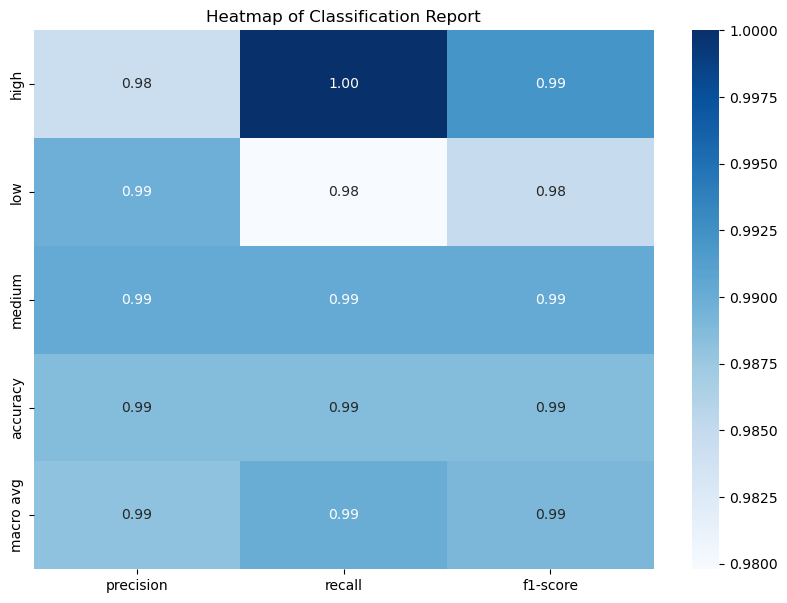

In [78]:
#Convert classification report to dataframe for visualizing
report = classification_report(Y_test, Y_pred, output_dict=True)

report_df = pd.DataFrame(report).transpose()

#Create a heatmap to visualize the report
plt.figure(figsize=(10, 7))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues', fmt='.2f', cbar=True)
plt.title('Heatmap of Classification Report')
plt.show()

{'high': {'precision': 0.984375, 'recall': 1.0, 'f1-score': 0.9921259842519685, 'support': 63.0}, 'low': {'precision': 0.9897959183673469, 'recall': 0.9797979797979798, 'f1-score': 0.9847715736040609, 'support': 99.0}, 'medium': {'precision': 0.9902912621359223, 'recall': 0.9902912621359223, 'f1-score': 0.9902912621359223, 'support': 103.0}, 'accuracy': 0.9886792452830189, 'macro avg': {'precision': 0.9881540601677564, 'recall': 0.9900297473113007, 'f1-score': 0.9890629399973173, 'support': 265.0}, 'weighted avg': {'precision': 0.9886997015787448, 'recall': 0.9886792452830189, 'f1-score': 0.9886653690365135, 'support': 265.0}}
